# Dataset Overview

##### * MLOGP (Molar Log P): This is a measure of the compound's lipophilicity, often represented as the logarithm of the octanol/water partition coefficient (log P). Lipophilicity is a key factor in bioaccumulation and permeability through biological membranes, which can directly influence a compound's toxicity.

##### * CIC0 (Information Indices): These are topological indices derived from the molecular graph of the compound. They provide information about the compound's molecular structure without explicit reference to 3D shape. Such indices often correlate with various physicochemical properties and biological activities.

##### * GATS1i (2D Autocorrelations): Geary Autocorrelation of lag 1 weighted by ionization potential. It's a 2D autocorrelation descriptor that captures information about molecular topology and electron distribution. This descriptor can be related to how a molecule interacts with biological targets.

##### * NdssC (Atom-Type Counts - Sulfur): This descriptor counts the number of sulfur atoms in the molecule. The presence of certain types of atoms (like sulfur) can influence the reactivity and hence the toxicity of a molecule.

##### * NdsCH (Atom-Type Counts - CH Groups): This refers to the count of specific types of carbon-hydrogen groups in the molecule. The structure and count of such groups can affect a molecule's physical and chemical properties, influencing its biological activity.

##### * SM1_Dz(Z) (2D Matrix-Based Descriptors): This is a descriptor derived from a 2D matrix representation of the molecular structure. It typically captures information about the spatial arrangement of atoms or functional groups within the molecule, influencing its chemical behavior and interactions in a biological context.

In [3]:
#  Imports to get the job done.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
correct_column_names = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdssC', 'NdsCH', 'MLOGP', 'Fish Toxicity']
file_path = r"data/qsar_fish_toxicity.csv"
# Importing the data with the correct column names
df = pd.read_csv(file_path, delimiter=';', names=correct_column_names)

# Displaying the first few rows of the data
df.head()


,CIC0,SM1_Dz(Z),GATS1i,NdssC,NdsCH,MLOGP,Fish Toxicity
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [4]:
df.shape

(908, 7)

In [6]:
df.isnull().sum()

CIC0             0
SM1_Dz(Z)        0
GATS1i           0
NdssC            0
NdsCH            0
MLOGP            0
Fish Toxicity    0
dtype: int64

In [5]:
df.describe()

,CIC0,SM1_Dz(Z),GATS1i,NdssC,NdsCH,MLOGP,Fish Toxicity
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


## Univariate Analysis / Skewness / Distributions

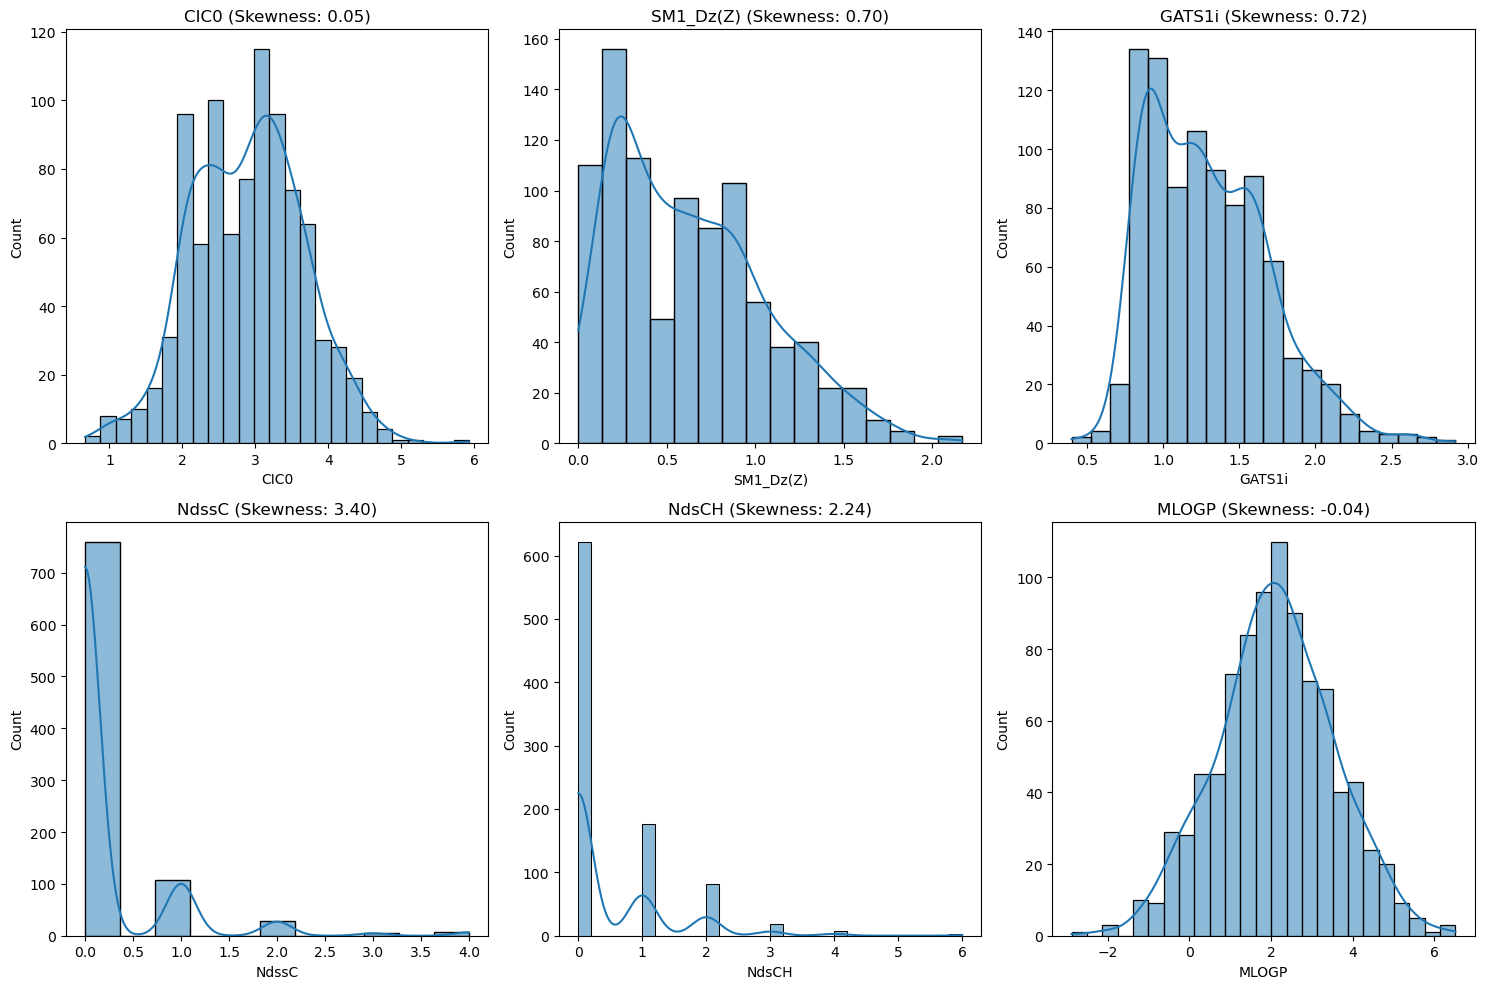

CIC0         0.045458
SM1_Dz(Z)    0.695090
GATS1i       0.723107
NdssC        3.400815
NdsCH        2.239090
MLOGP       -0.035191
dtype: float64

In [72]:
# Calculating the skewness of each feature
feature_skewness = df.drop('Fish Toxicity', axis=1).skew()

# Plotting histograms for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):  # Excluding the target variable
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'{column} (Skewness: {feature_skewness[column]:.2f})')

plt.tight_layout()
plt.show()

feature_skewness

## Skewness Analysis
#### The skewness values and the corresponding histograms for each feature (excluding the target variable) are as follows:

#### MLOGP:

#### Skewness: -0.03
#### The distribution appears fairly symmetrical, as indicated by the low skewness value.
#### CIC0:

#### Skewness: 0.04
#### This shows a moderate right skew. A transformation might help in normalizing this distribution.
#### GATS1i:

#### Skewness: 0.72
#### Similar to CIC0, this feature also has a moderate right skew.
#### NdssC:

#### Skewness: 3.40
#### This feature shows a high positive skewness, indicating a strong right skew. A transformation is likely needed.
#### NdsCH:

#### Skewness: 2.24
#### Another highly positively skewed distribution, suggesting the need for transformation.
#### SM1_Dz(Z):

#### Skewness: 0.70
#### The distribution is almost symmetrical.

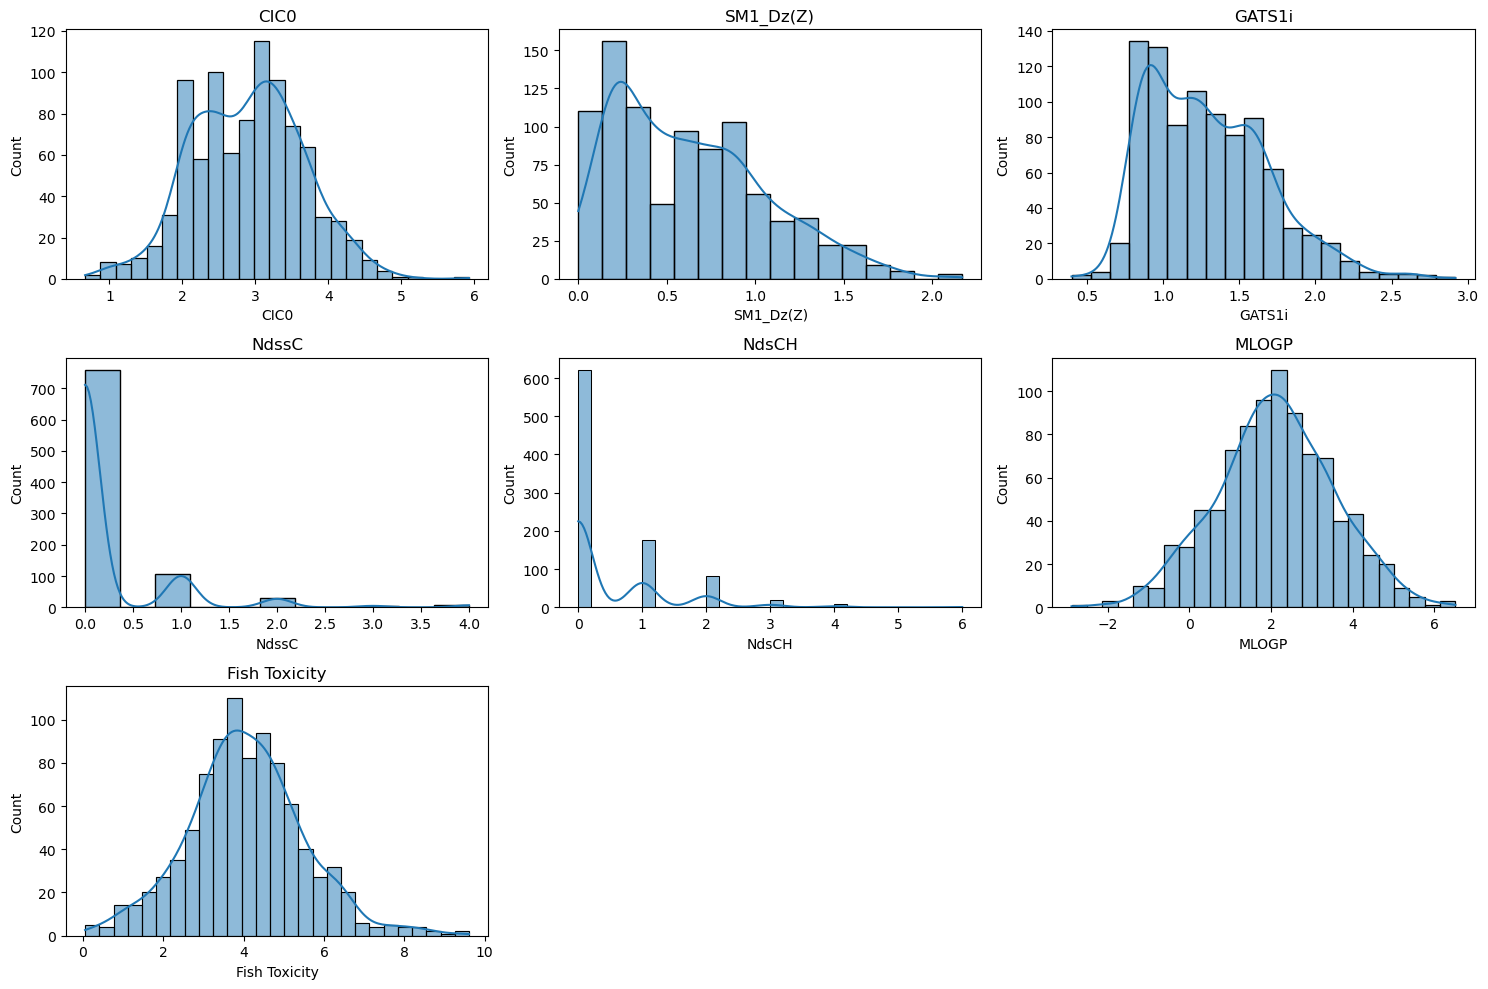

In [7]:
# Univariate Analysis: Plotting histograms for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


### Features like "CIC0", "GATS1i", "NdssC", and "NdsCH" exhibit varying degrees of positive skewness. Particularly, "NdssC" and "NdsCH" show high skewness, which could affect the performance of linear regression models.
### For these skewed features, applying transformations such as logarithmic, square root, or Box-Cox transformations can help in normalizing their distributions.
### Features "MLOGP" and "SM1_Dz(Z)" are fairly symmetric and may not require transformation.

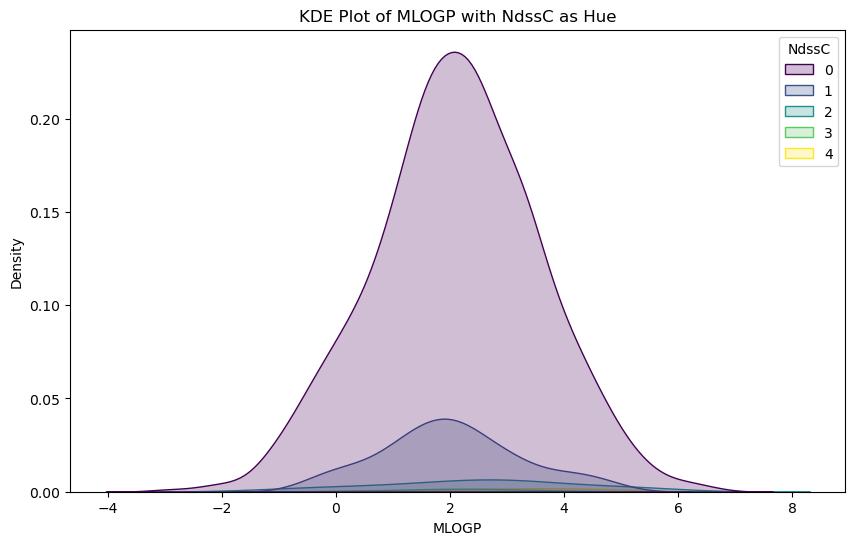

In [43]:
# KDE plot with hue
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='MLOGP', hue='NdssC', palette='viridis', fill=True)
plt.title('KDE Plot of MLOGP with NdssC as Hue')
plt.show()


####  This will allow us to see how the distribution of "MLOGP" varies across different values of "NdssC"

### Univariate Analysis:

##### * The distribution of each feature shows varying degrees of skewness. This is typical in chemical and biological data.
##### * Descriptive statistics reveal the central tendencies and variabilities of each feature. For example, MLOGP has a mean of 2.11 with a standard deviation of 1.4, indicating the spread around the mean.

## Now lets move to Bi-Variate Analysis

C:\Users\mjcol\AppData\Local\Temp\ipykernel_21452\1982493175.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='NdsCH', y='Fish Toxicity', hue='NdssC', data=df, palette='viridis', ci=None)


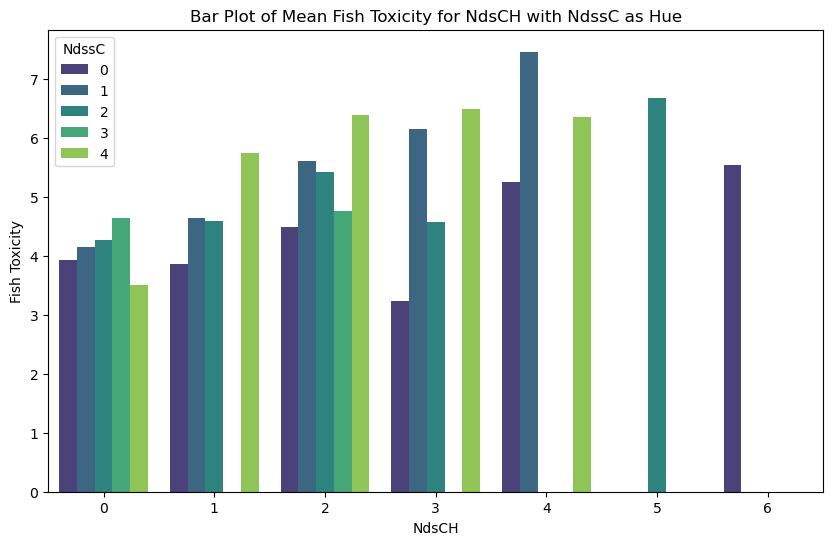

In [42]:
# Bar plot with hue
plt.figure(figsize=(10, 6))
sns.barplot(x='NdsCH', y='Fish Toxicity', hue='NdssC', data=df, palette='viridis', ci=None)
plt.title('Bar Plot of Mean Fish Toxicity for NdsCH with NdssC as Hue')
plt.legend(title='NdssC')
plt.show()



### Bar Plot (Mean Fish Toxicity for NdsCH with NdssC as Hue):

#### * This plot shows the average Fish Toxicity for each "NdsCH" category, with different colors representing different "NdssC" categories.
#### Finding: It indicates how Fish Toxicity varies across "NdsCH" categories and suggests possible interactions between "NdsCH" and "NdssC" in determining Fish Toxicity. Some combinations of "NdsCH" and "NdssC" might be associated with higher or lower average toxicity levels.

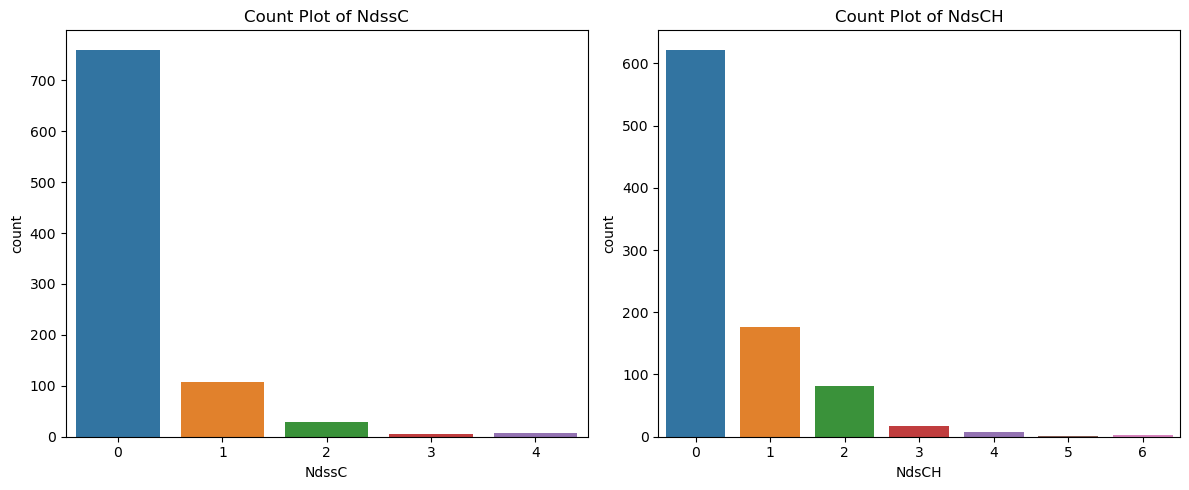

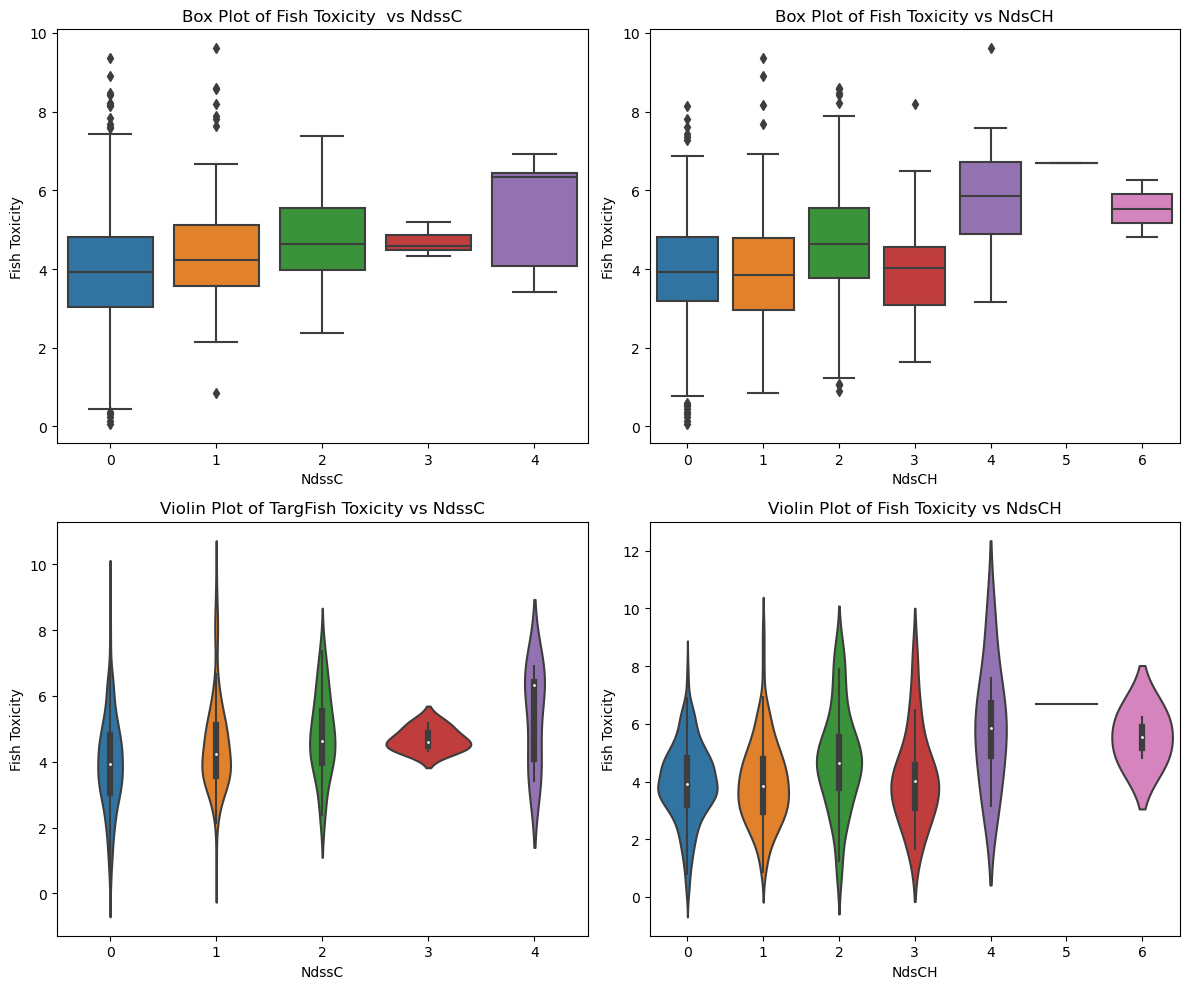

In [18]:
# Count plots for "NdssC" and "NdsCH"
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='NdssC')
plt.title('Count Plot of NdssC')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='NdsCH')
plt.title('Count Plot of NdsCH')

plt.tight_layout()
plt.show()

# Box plots and violin plots for "NdssC" and "NdsCH" against the target
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='NdssC', y='Fish Toxicity', data=df)
plt.title('Box Plot of Fish Toxicity  vs NdssC')

plt.subplot(2, 2, 2)
sns.boxplot(x='NdsCH', y='Fish Toxicity', data=df)
plt.title('Box Plot of Fish Toxicity vs NdsCH')

plt.subplot(2, 2, 3)
sns.violinplot(x='NdssC', y='Fish Toxicity', data=df)
plt.title('Violin Plot of TargFish Toxicity vs NdssC')

plt.subplot(2, 2, 4)
sns.violinplot(x='NdsCH', y='Fish Toxicity', data=df)
plt.title('Violin Plot of Fish Toxicity vs NdsCH')

plt.tight_layout()
plt.show()


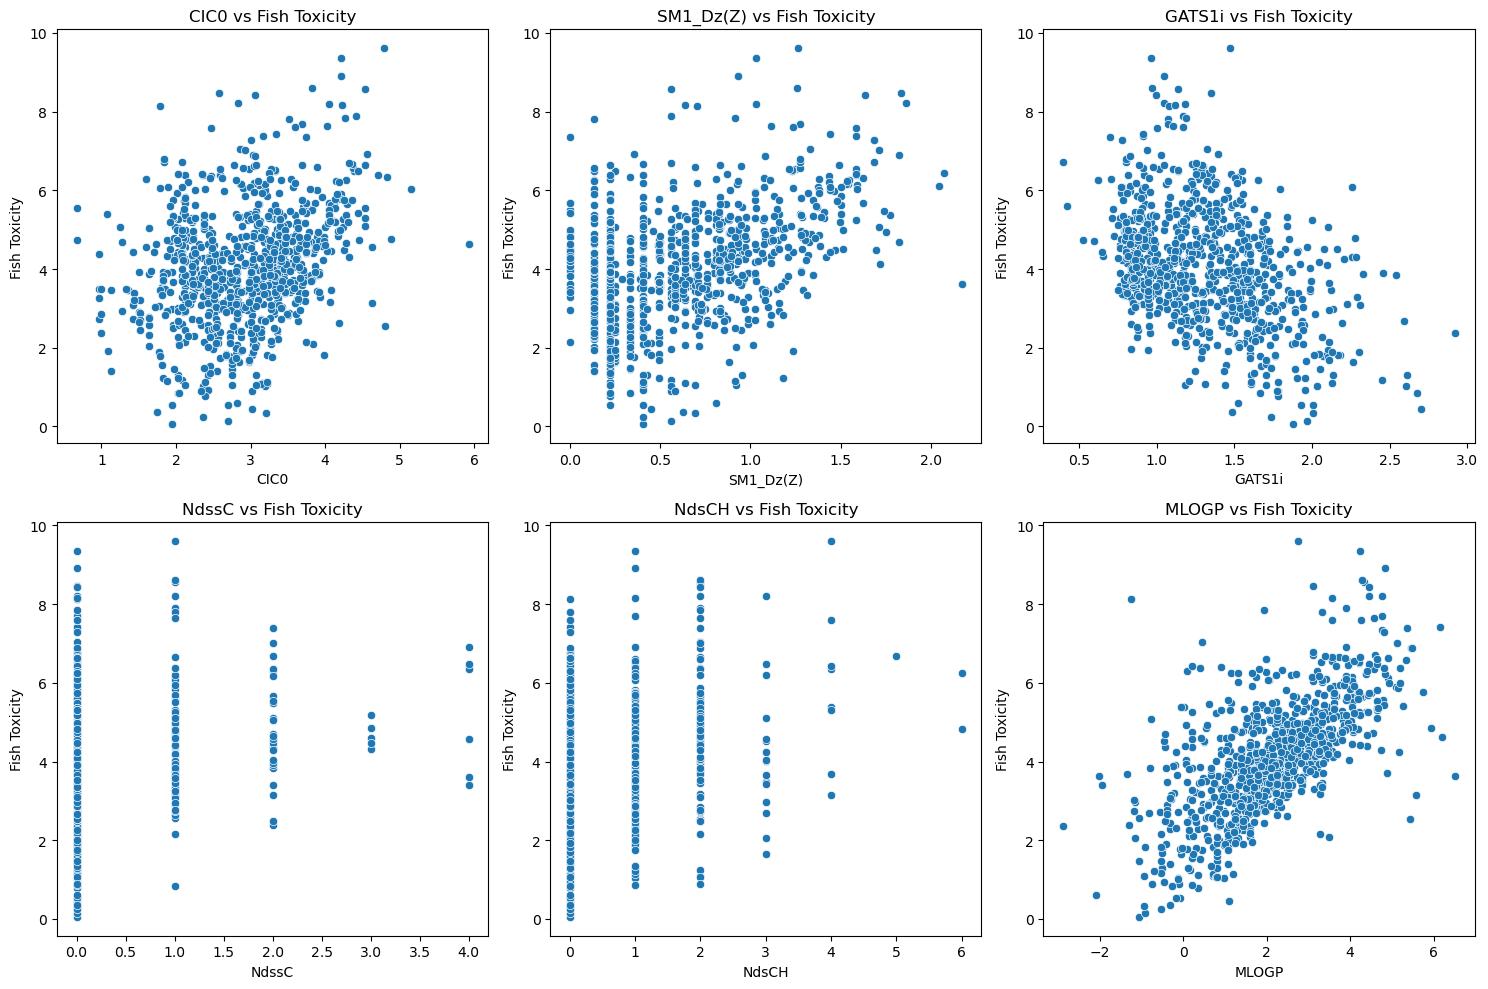

In [11]:
# Bivariate analysis - Scatter plots for each feature against the target with updated column names
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns[:-1], 1):  # Excluding the target variable
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[column], y=df['Fish Toxicity'])
    plt.title(f"{column} vs Fish Toxicity")

plt.tight_layout()
plt.show()

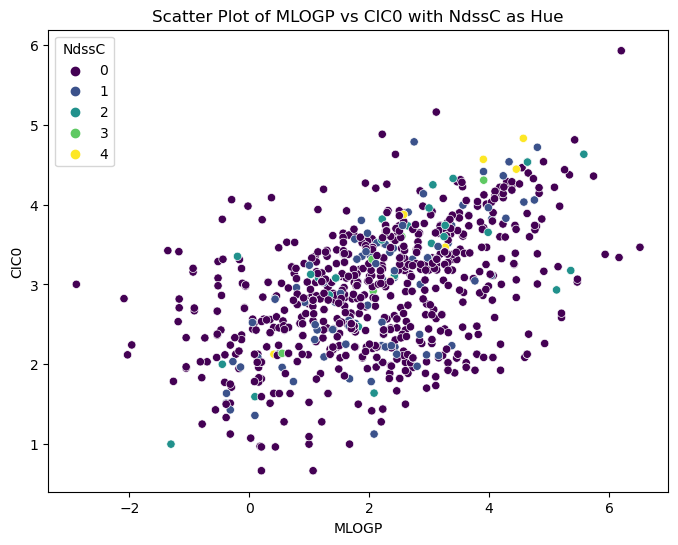

"\nsns.scatterplot(x='MLOGP', y='CIC0', hue='NdssC', data=data, palette='viridis')\nplt.title('Scatter Plot of MLOGP vs CIC0 with NdssC as Hue')\nplt.show()\n"

In [20]:
# Scatter plot with hue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MLOGP', y='CIC0', hue='NdssC', data=df, palette='viridis')
plt.title('Scatter Plot of MLOGP vs CIC0 with NdssC as Hue')
plt.show()


c:\Users\mjcol\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


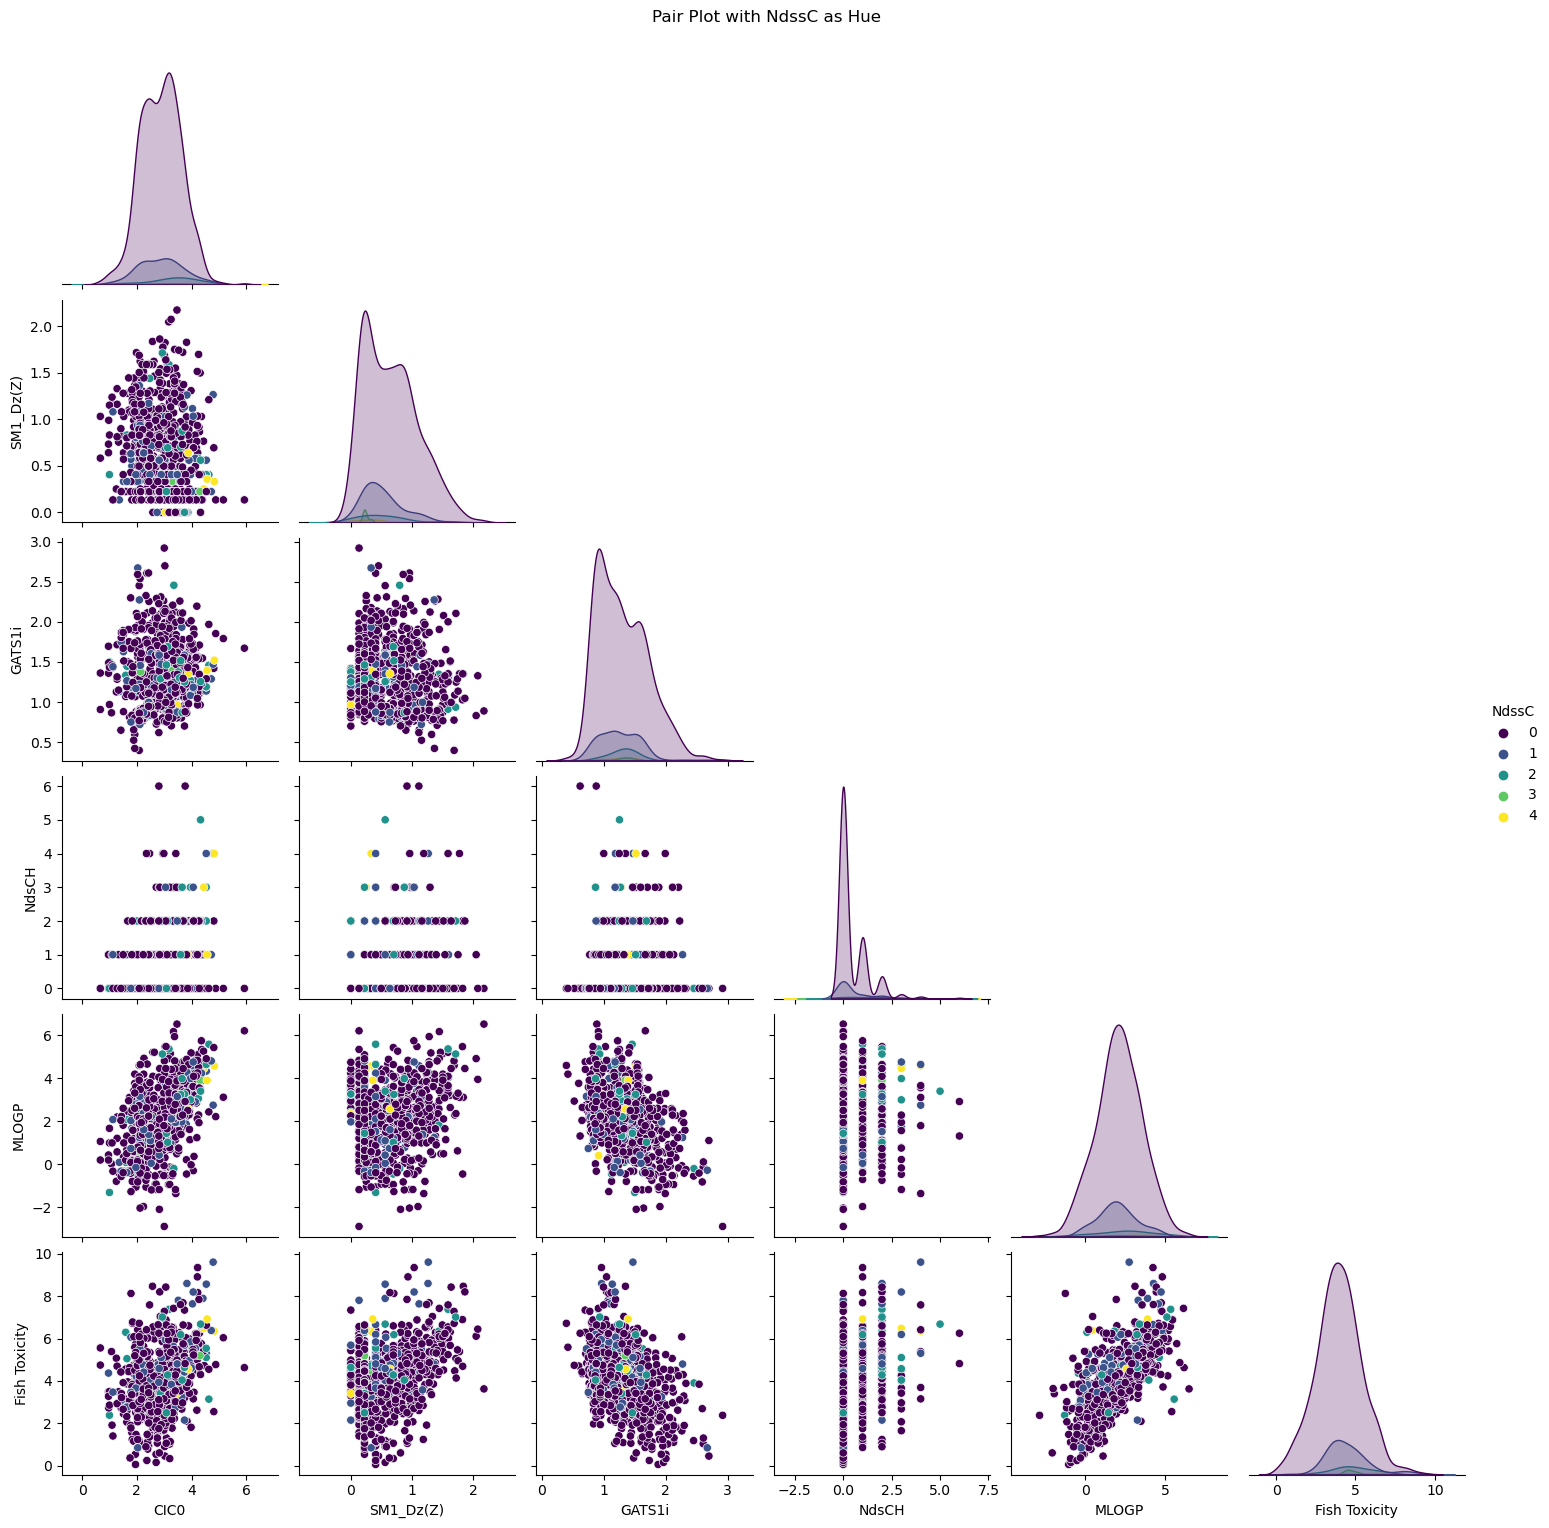

In [21]:
# Pair plot with hue
sns.pairplot(df, hue='NdssC', palette='viridis', corner=True)
plt.suptitle('Pair Plot with NdssC as Hue', y=1.02)  # Adjust title position
plt.show()

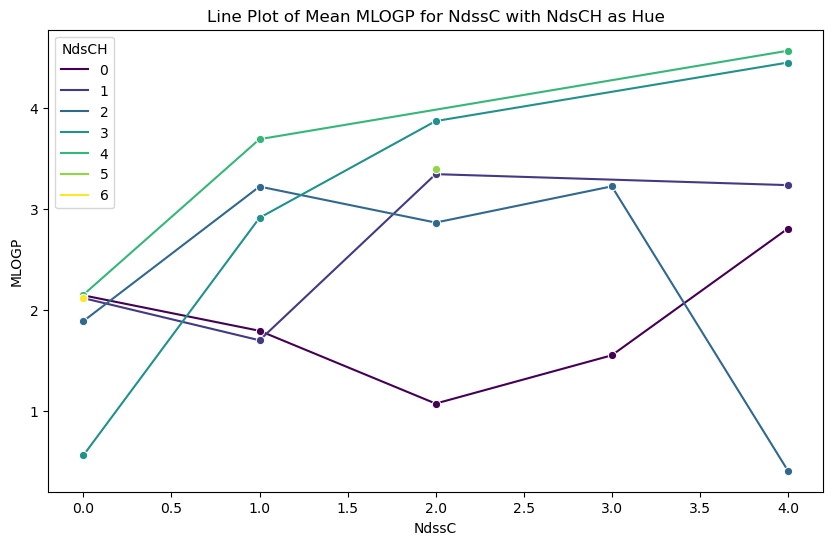

In [45]:
# Grouping data for line plot
grouped_line_data = df.groupby(['NdssC', 'NdsCH']).mean().reset_index()

# Line plot with hue
plt.figure(figsize=(10, 6))
sns.lineplot(x='NdssC', y='MLOGP', hue='NdsCH', data=grouped_line_data, palette='viridis', marker='o')
plt.title('Line Plot of Mean MLOGP for NdssC with NdsCH as Hue')
plt.show()

## Line Plot (Mean MLOGP for NdssC with NdsCH as Hue):

#### The line plot shows the trend of mean "MLOGP" across different "NdssC" categories, with each line representing a different "NdsCH" category.
#### Finding: It illustrates how the average "MLOGP" changes with "NdssC", differentiated by "NdsCH". This can indicate trends or patterns in molecular properties relative to atom-type counts, revealing potential relationships between these features.

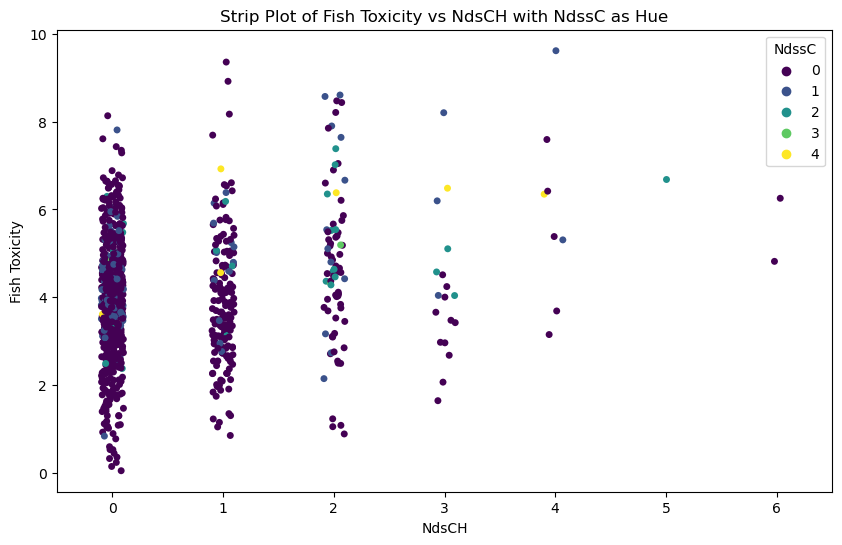

In [44]:
# Strip plot with hue
plt.figure(figsize=(10, 6))
sns.stripplot(x='NdsCH', y='Fish Toxicity', hue='NdssC', data=df, palette='viridis', jitter=True)
plt.title('Strip Plot of Fish Toxicity vs NdsCH with NdssC as Hue')
plt.legend(title='NdssC')
plt.show()

### Strip Plot (Fish Toxicity vs NdsCH with NdssC as Hue):

##### This plot displays individual data points for Fish Toxicity against "NdsCH", with colors indicating different "NdssC" categories.
##### Finding: It shows the spread and density of Fish Toxicity data points within each "NdsCH" category and how this spread differs across "NdssC" categories. The plot can also highlight any potential outliers or unusual observations in Fish Toxicity.

c:\Users\mjcol\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


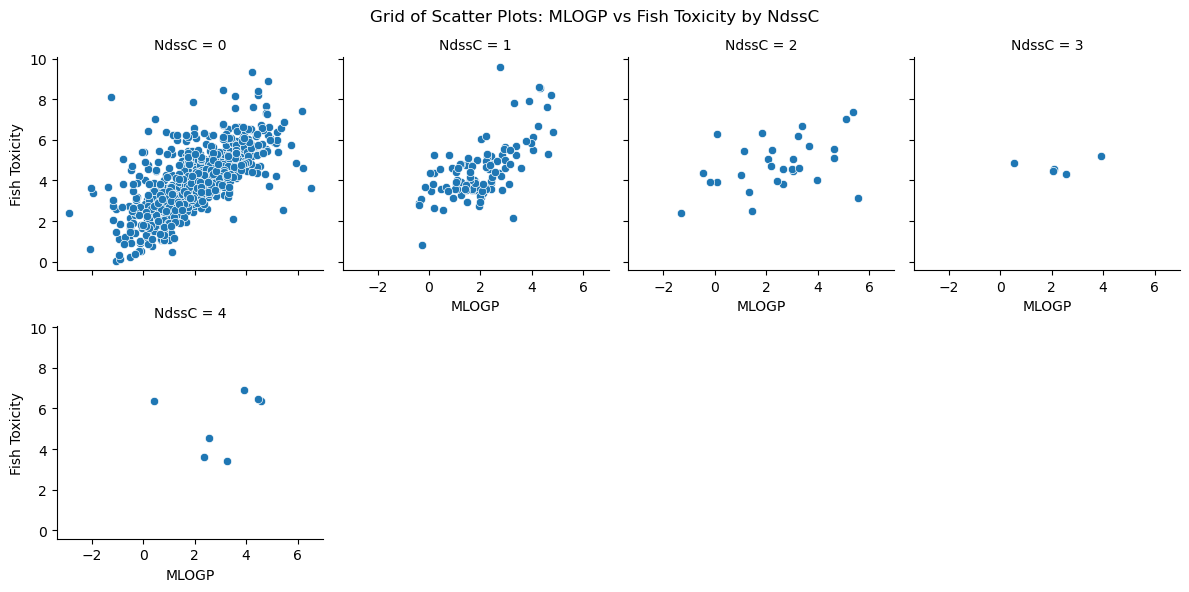

In [26]:

# Facet Grid with scatter plots
g = sns.FacetGrid(df, col='NdssC', col_wrap=4, height=3, aspect=1)
g = g.map(sns.scatterplot, 'MLOGP', 'Fish Toxicity', edgecolor="w")

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Grid of Scatter Plots: MLOGP vs Fish Toxicity by NdssC')
plt.show()


## Facet Grid (MLOGP vs Fish Toxicity by NdssC):

#### A series of scatter plots, each representing a different value of "NdssC", showing the relationship between "MLOGP" and Fish Toxicity.
##### Finding: This grid allows for the comparison of relationships across different "NdssC" categories. It may reveal whether the relationship between "MLOGP" and Fish Toxicity changes with different atom-type counts.

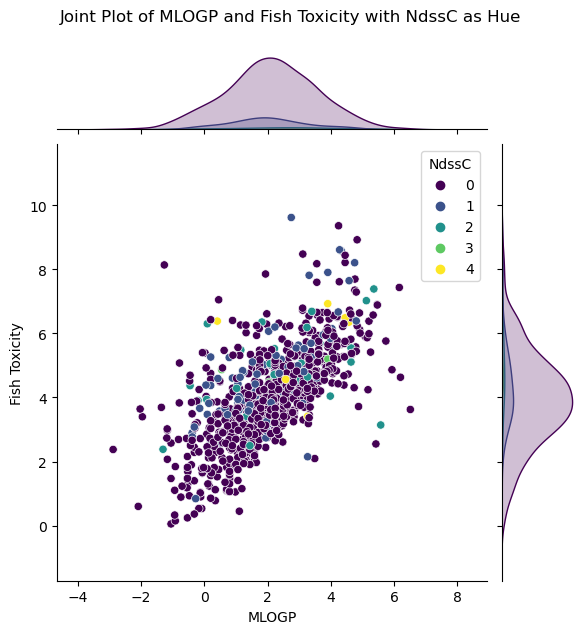

In [29]:
# Joint plot
sns.jointplot(x='MLOGP', y='Fish Toxicity', data=df, kind='scatter', hue='NdssC', palette='viridis')
plt.suptitle('Joint Plot of MLOGP and Fish Toxicity with NdssC as Hue', y=1.05)
plt.show()


C:\Users\mjcol\AppData\Local\Temp\ipykernel_21452\3844762744.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='NdssC', y='Fish Toxicity', data=df, palette='viridis')
c:\Users\mjcol\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\mjcol\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


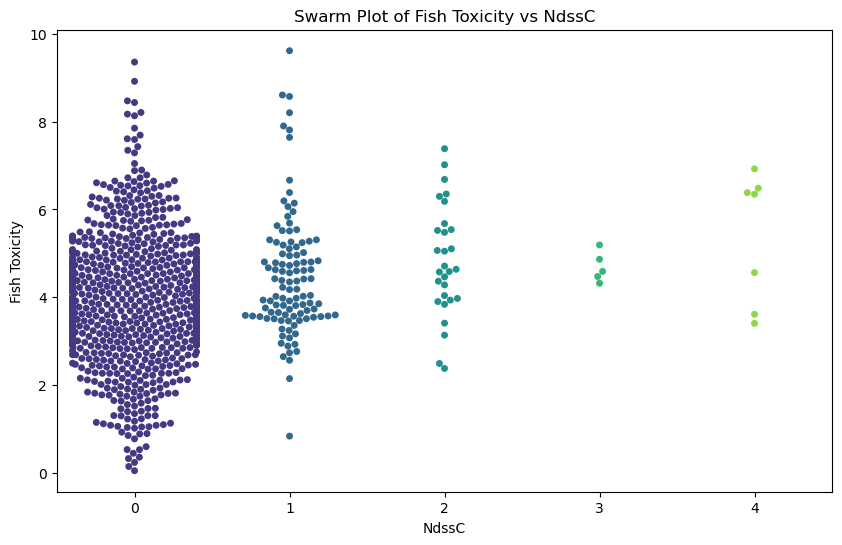

In [32]:
# Swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='NdssC', y='Fish Toxicity', data=df, palette='viridis')
plt.title('Swarm Plot of Fish Toxicity vs NdssC')
plt.show()

### 3d charts to see what we uncover....

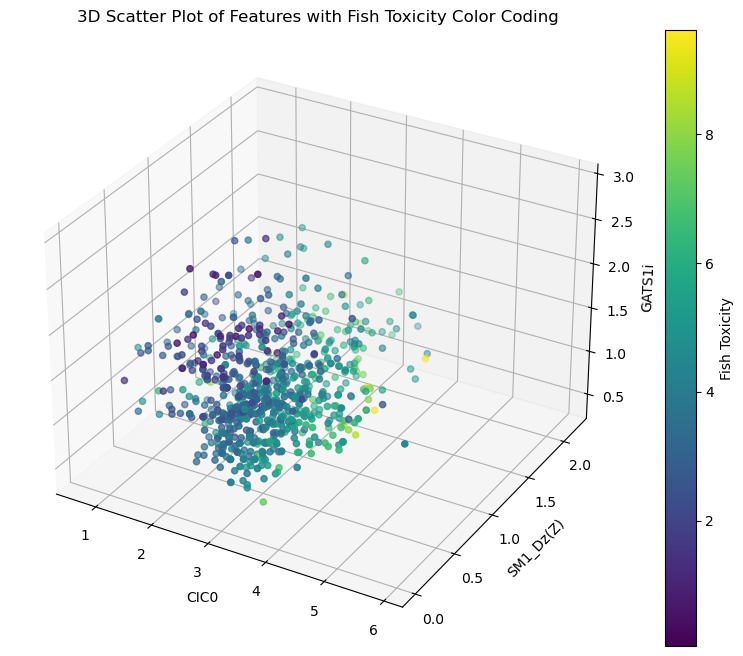

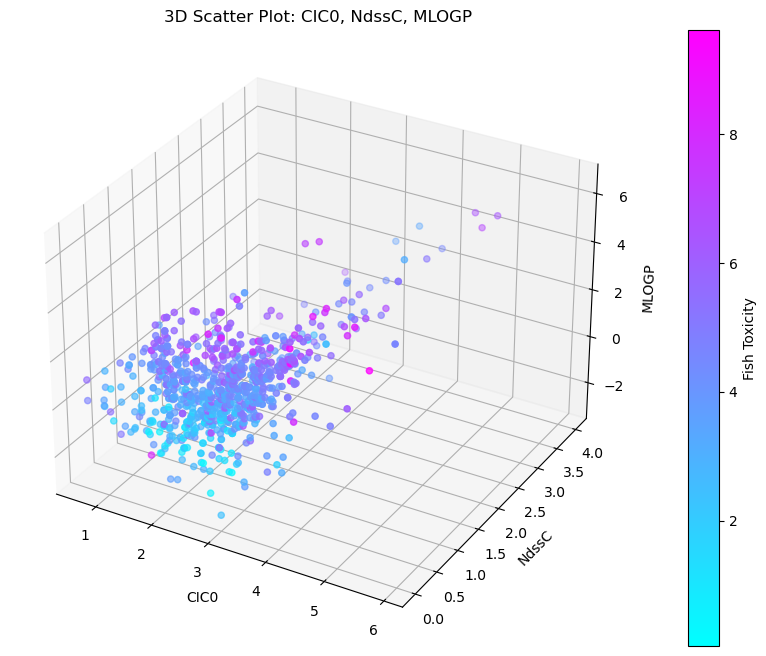

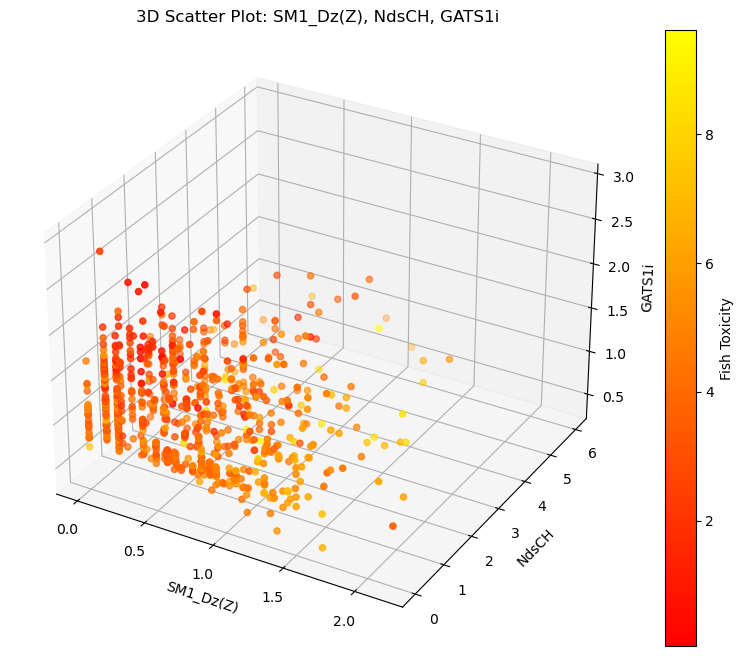

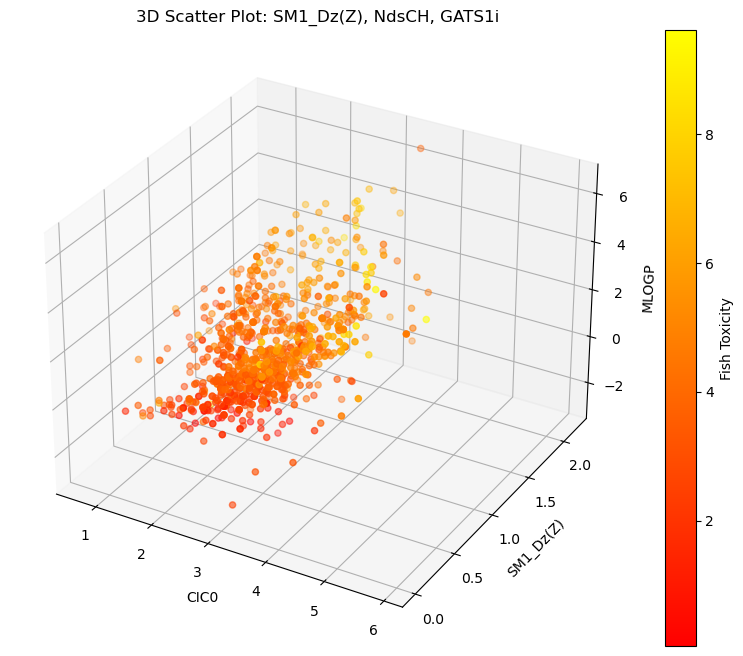

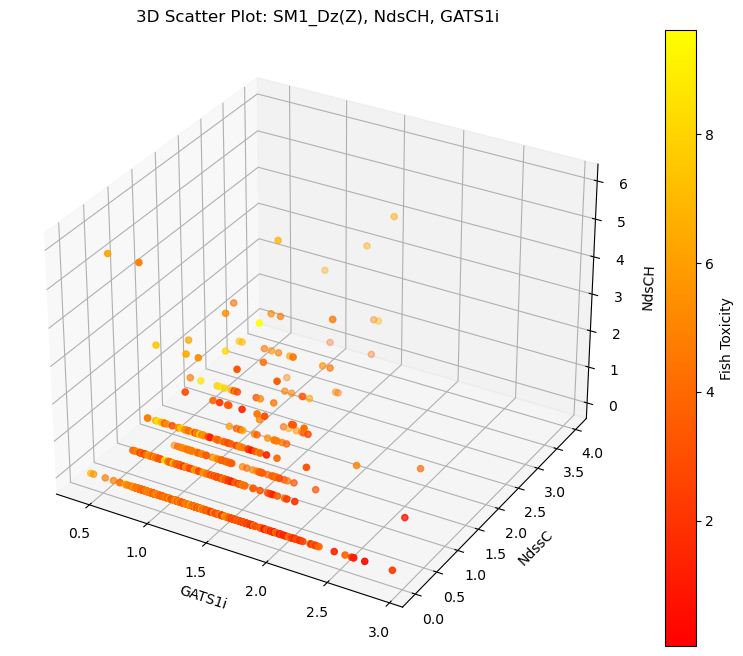

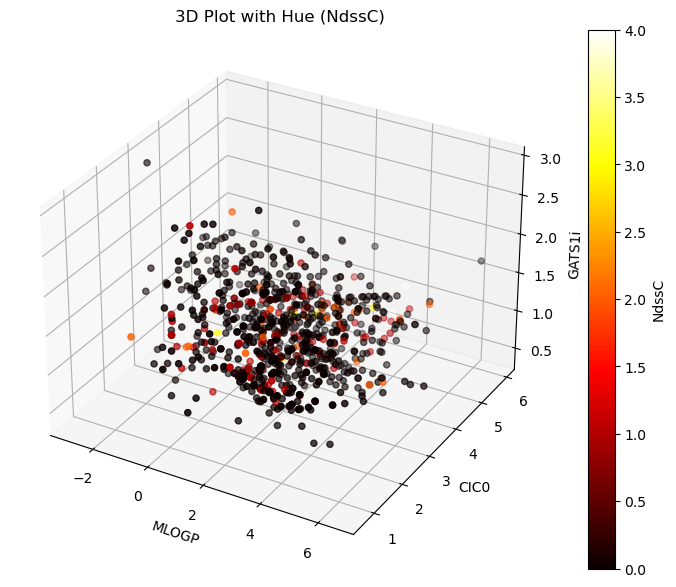

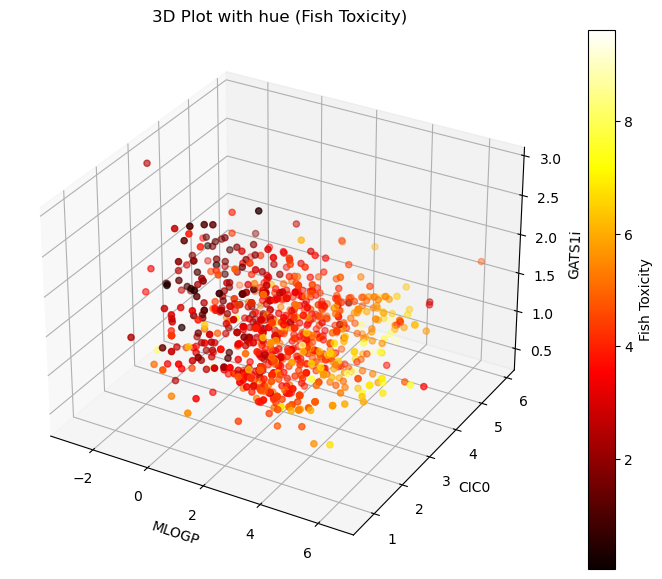

In [69]:
# Selecting three features for the 3D plot
features = ['CIC0', 'SM1_Dz(Z)', 'GATS1i']
# Second combination of features
features_2 = ['CIC0', 'NdssC', 'MLOGP']
# Third combination of features
features_3 = ['SM1_Dz(Z)', 'NdsCH', 'GATS1i']
# Fourth combination of features
features_4 = ['CIC0', 'SM1_Dz(Z)', 'MLOGP']
# Fifth combination of features
features_5 = ['GATS1i', 'NdssC', 'NdsCH']

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Plotting data
sc = ax.scatter(df[features[0]], df[features[1]], df[features[2]], 
                c=df['Fish Toxicity'], cmap='viridis')
# Labels and title
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title('3D Scatter Plot of Features with Fish Toxicity Color Coding')
# Color bar
plt.colorbar(sc, label='Fish Toxicity')
plt.show()

fig = plt.figure(figsize=(16, 8))
# 3D scatter plot for the second combination with legend
ax1 = fig.add_subplot(111, projection='3d')
sc1 = ax1.scatter(df[features_2[0]], df[features_2[1]], df[features_2[2]], 
                c=df['Fish Toxicity'], cmap='cool')
ax1.set_xlabel(features_2[0])
ax1.set_ylabel(features_2[1])
ax1.set_zlabel(features_2[2])
ax1.set_title('3D Scatter Plot: ' + ', '.join(features_2))
plt.colorbar(sc1, label='Fish Toxicity')
plt.show()

# 3D scatter plot for the second combination
# Creating figures
fig = plt.figure(figsize=(10, 8))
ax2 = fig.add_subplot(111, projection='3d')
sc2 = ax2.scatter(df[features_3[0]], df[features_3[1]], df[features_3[2]], 
                c=df['Fish Toxicity'], cmap='autumn')
ax2.set_xlabel(features_3[0])
ax2.set_ylabel(features_3[1])
ax2.set_zlabel(features_3[2])
ax2.set_title('3D Scatter Plot: ' + ', '.join(features_3))
plt.colorbar(sc2, label='Fish Toxicity')
plt.show()
# next chart
fig = plt.figure(figsize=(10, 8))
ax2 = fig.add_subplot(111, projection='3d')
sc3 = ax2.scatter(df[features_4[0]], df[features_4[1]], df[features_4[2]], 
                c=df['Fish Toxicity'], cmap='autumn')
ax2.set_xlabel(features_4[0])
ax2.set_ylabel(features_4[1])
ax2.set_zlabel(features_4[2])
ax2.set_title('3D Scatter Plot: ' + ', '.join(features_3))
plt.colorbar(sc3, label='Fish Toxicity')
plt.show()
# next chart
fig = plt.figure(figsize=(10, 8))
ax2 = fig.add_subplot(111, projection='3d')
sc4 = ax2.scatter(df[features_5[0]], df[features_5[1]], df[features_5[2]], 
                c=df['Fish Toxicity'], cmap='autumn')
ax2.set_xlabel(features_5[0])
ax2.set_ylabel(features_5[1])
ax2.set_zlabel(features_5[2])
ax2.set_title('3D Scatter Plot: ' + ', '.join(features_3))
plt.colorbar(sc4, label='Fish Toxicity')
plt.show()



# extra  chart
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = df['MLOGP']
y = df['CIC0']
z = df['GATS1i']
c = df['NdssC']  # Using NdssC as color (hue)

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
ax.set_xlabel('MLOGP')
ax.set_ylabel('CIC0')
ax.set_zlabel('GATS1i')
fig.colorbar(img,label="NdssC")
plt.title("3D Plot with Hue (NdssC)")
plt.show()

# extra chart
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = df['MLOGP']
y = df['CIC0']
z = df['GATS1i']
c = df['Fish Toxicity']  # Using Fish Toxicity as color (hue)

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
ax.set_xlabel('MLOGP')
ax.set_ylabel('CIC0')
ax.set_zlabel('GATS1i')
fig.colorbar(img,label="Fish Toxicity")
plt.title("3D Plot with hue (Fish Toxicity)")
plt.show()

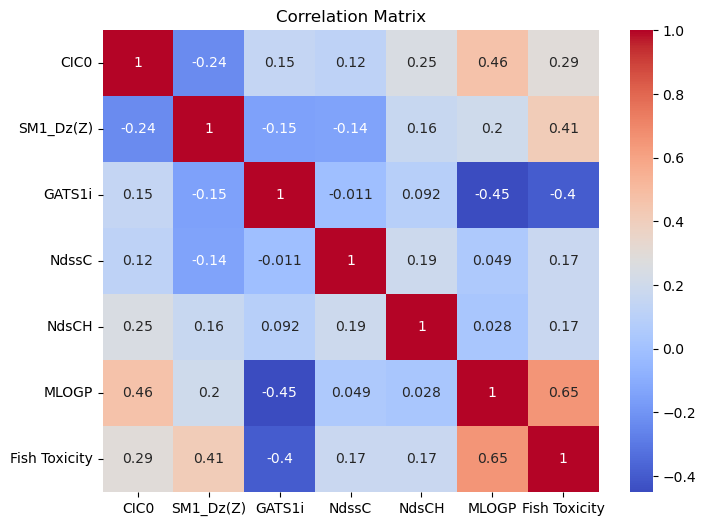

In [13]:
# Correlation matrix with updated column names
correlation_matrix_updated = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_updated, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

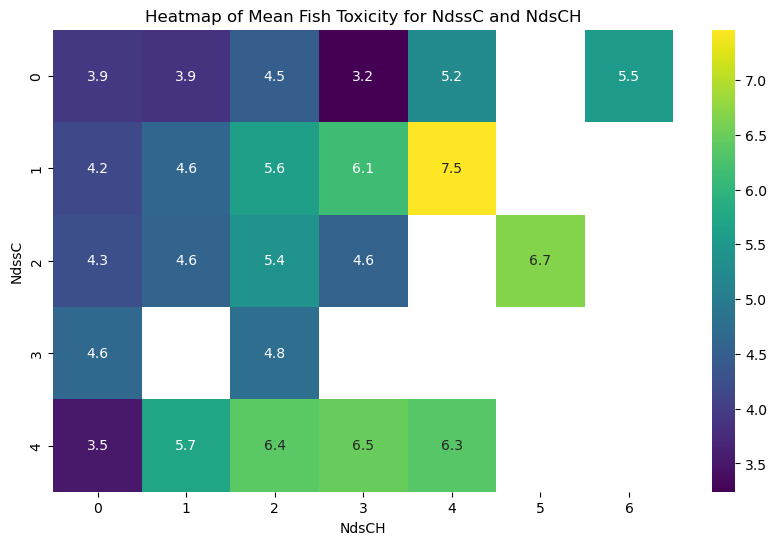

In [35]:
# Heatmap of grouped data
grouped_data = df.groupby(['NdssC', 'NdsCH']).mean()['Fish Toxicity'].unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_data, annot=True, cmap='viridis')
plt.title('Heatmap of Mean Fish Toxicity for NdssC and NdsCH')
plt.show()

# Univariate Analysis
* The univariate analysis revealed varied distributions for each feature. Skewed distributions were observed in several descriptors, indicating a need for potential data transformations in predictive modeling.

* Bivariate and Multivariate Analysis
Scatter Plots
Scatter plots of features against Fish Toxicity showed diverse linear and non-linear relationships, suggesting different levels of influence on the target variable.

* Correlation Analysis
A correlation matrix highlighted varying degrees of linear relationships among the features and with Fish Toxicity. This analysis is crucial for identifying potential predictors and understanding feature interactions.

* 3D Plots
3D visualizations provided an enhanced view of the interactions among multiple molecular descriptors, offering insights into the complex relationships that might influence Fish Toxicity.

* Facet Grids and Joint Plots
Facet grids and joint plots allowed for a detailed examination of relationships between specific pairs of features and Fish Toxicity, across different categories of other features (like "NdssC").

* Analysis of Discrete Variables
Count Plots and Distribution Visualizations
Count plots for "NdssC" and "NdsCH" revealed the frequency distribution of atom-type counts. Box plots, violin plots, and swarm plots further illuminated how these counts relate to variations in Fish Toxicity, highlighting central tendencies and dispersion.

* Line Plot Analysis
Line plots depicting the mean values of molecular descriptors across different categories provided insights into trends and potential relationships within the data.

# Overall Insights
Feature Relationships: The analysis underscored the importance of molecular descriptors in predicting Fish Toxicity. Certain features displayed stronger relationships with the target variable.
Data Distribution: The distribution patterns observed necessitate careful consideration in data preprocessing for modeling.
Discrete Variable Analysis: The discrete nature of "NdssC" and "NdsCH" was found to significantly influence Fish Toxicity, as seen in various plots.
Potential Predictors: Features like "MLOGP", "CIC0", and "GATS1i" showed noticeable relationships with Fish Toxicity, indicating their potential as predictors in a QSAR model.
Conclusions and Recommendations
This exploratory data analysis provided valuable insights into the QSAR dataset, revealing intricate relationships between molecular descriptors and Fish Toxicity. For predictive modeling:

Feature Selection: Focus on features with strong correlations and clear patterns.
Data Transformation: Consider transformations for skewed distributions.
Modeling Approach: Investigate models that capture both linear and non-linear relationships.
The analysis sets a foundation for developing a robust model to predict Fish Toxicity based on QSAR, which can be instrumental in environmental toxicology and chemical risk assessment.

# Recommendations
#### Feature Selection: Focus on features with strong correlations and clear patterns.
#### Data Transformation: Consider transformations for skewed distributions.
#### Modeling Approach: Investigate models that capture both linear and non-linear relationships.

#### Handling Missing Values: Ensure there are no missing values in the dataset.
#### Feature Scaling: Standardize or normalize the features.
#### Train-Test Split: Split the data into training and testing sets.